In [1]:
# Main data packages. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import requests
import seaborn as sns
import imblearn
from collections import Counter

## Input Data:

In order to find out any Correlations between the features for the rebap energy price, we combine several data sets into ONE data frame and analyse it via Correlation Analysis. As input data sets we choose:
1. regelleistung_aggr_4h.csv
2. onlinehochrechnung_windoffshore_mw.csv
3. onlinehochrechnung_windonshore_mw.csv
4. onlinehochrechnung_solar_mw.csv
5. power_act_.csv
6. power_fc_.csv
7. EQ_epex_da_last_prognosis_count.csv
8. es_fc_solar_ts.csv
9. es_fc_total_load_ts.csv
10. es_fc_total_renewables_ts.csv
11. es_fc_wind_offshore_ts.csv
12. es_fc_wind_onshore_ts.csv
13. wind_speed_ts.csv (In data/data_processed folder, created from einspeisedaten_gen_wind_speed.csv)
14. imbalance_de_labeled.csv(in data/data_processed folder, remove "power_mw" column)

In [3]:
df_1 = pd.read_csv("data/PCA Data Sets/regelleistung_aggr_4h.csv")

In [4]:
df_1['timestamp']=df_1['timestamp'].astype('datetime64')

In [5]:
df_2 = pd.read_csv("data/PCA Data Sets/onlinehochrechnung_windoffshore_mw.csv", delimiter= "///")

In [6]:
df_2['dt_start_utc']=df_2['dt_start_utc'].astype('datetime64')

In [7]:
df_3 = pd.read_csv("data/PCA Data Sets/onlinehochrechnung_windonshore_mw.csv")

In [8]:
df_3.columns = ["dt_start_utc", "fiftyherz", "tennet", "amprion", "transnetbw", "nrv"]

In [9]:
df_3['dt_start_utc']=df_3['dt_start_utc'].astype('datetime64')

In [10]:
df_4 = pd.read_csv("data/PCA Data Sets/onlinehochrechnung_solar_mw.csv")

In [11]:
df_4['dt_start_utc']=df_4['dt_start_utc'].astype('datetime64')

In [12]:
df_5 = pd.read_csv("data/PCA Data Sets/power_act_.csv")

In [13]:
df_5['dt_start_utc']=df_5['dt_start_utc'].astype('datetime64')

In [14]:
df_6 = pd.read_csv("data/PCA Data Sets/power_fc_.csv")

In [15]:
df_6['dt_start_utc']=df_6['dt_start_utc'].astype('datetime64')

In [16]:
df_7 = pd.read_csv("data/PCA Data Sets/EQ_epex_da_last_prognosis_count.csv")

In [17]:
df_7['timestamp']=df_7['timestamp'].astype('datetime64')

In [18]:
df_8 = pd.read_csv("data/PCA Data Sets/es_fc_solar_ts.csv")

In [19]:
df_8['dt_start_utc']=df_8['dt_start_utc'].astype('datetime64')

In [20]:
df_9 = pd.read_csv("data/PCA Data Sets/es_fc_total_load_ts.csv")

In [21]:
df_9['dt_start_utc']=df_9['dt_start_utc'].astype('datetime64')

In [22]:
df_10 = pd.read_csv("data/PCA Data Sets/es_fc_total_renewables_ts.csv")

In [23]:
df_10['dt_start_utc']=df_10['dt_start_utc'].astype('datetime64')

Create a df_10 variation which contains only the strongest correlated features in regard of the target variable:

In [24]:
df_10_compact = df_10[['dt_start_utc', "TTG_power_mw"]].copy()

In [25]:
df_11 = pd.read_csv("data/PCA Data Sets/es_fc_wind_offshore_ts.csv")

In [26]:
df_11['dt_start_utc']=df_11['dt_start_utc'].astype('datetime64')

Create a df_11 variation which contains only the strongest correlated features in regard of the target variable:

In [27]:
df_11_compact = df_11[['dt_start_utc', "DE_power_mw", "TTG_power_mw"]].copy()

In [28]:
df_12 = pd.read_csv("data/PCA Data Sets/es_fc_wind_onshore_ts.csv")

In [29]:
df_12['dt_start_utc']=df_12['dt_start_utc'].astype('datetime64')

Create a df_12 variation which contains only the strongest correlated features in regard of the target variable:

In [30]:
df_12_compact = df_12[['dt_start_utc', "50Hertz_power_mw", "DE_power_mw", "TTG_power_mw"]].copy()

In [31]:
df_13 = pd.read_csv("data/PCA Data Sets/wind_speed_ts.csv")

In [32]:
df_13['dt_start_utc']=df_13['dt_start_utc'].astype('datetime64')

In [33]:
df_14 = pd.read_csv("data/PCA Data Sets/imbalance_de_labeled.csv")

In [34]:
df_14['dt_start_utc']=df_14['dt_start_utc'].astype('datetime64')

In [35]:
df_14 = df_14.drop(["power_mw"], axis=1)

We know there are meaningful correlations between the features in df_13 (Windspeed) and the rebap imbalance price, therefore we create a combination dataframe out of these two plus df_7,  df_10_compact, df_11_compact, df_12_compact, as these features also correlate weakly with our target:

In [36]:
df_7.isna().sum()

timestamp    0
prognosis    0
dtype: int64

In [37]:
from apymb import *

df_pca = align(df_7, df_10_compact, df_11_compact, df_12_compact, df_13, df_14)

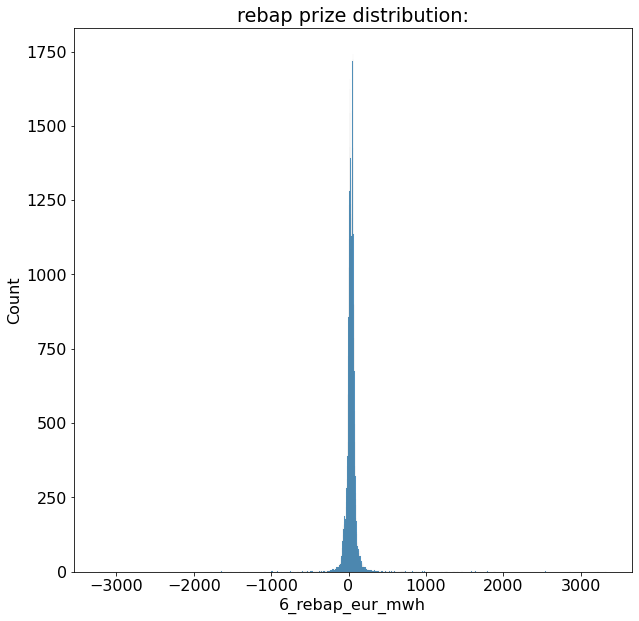

In [38]:
plt.figure(figsize=(10,10));
plt.rcParams.update({'font.size':16})
plt.title('rebap prize distribution:')
sns.histplot(data=df_pca, x="6_rebap_eur_mwh")
plt.show()

In [39]:
df_pca.to_csv("data/PCA Data Sets/PCA_combined_Data.csv")

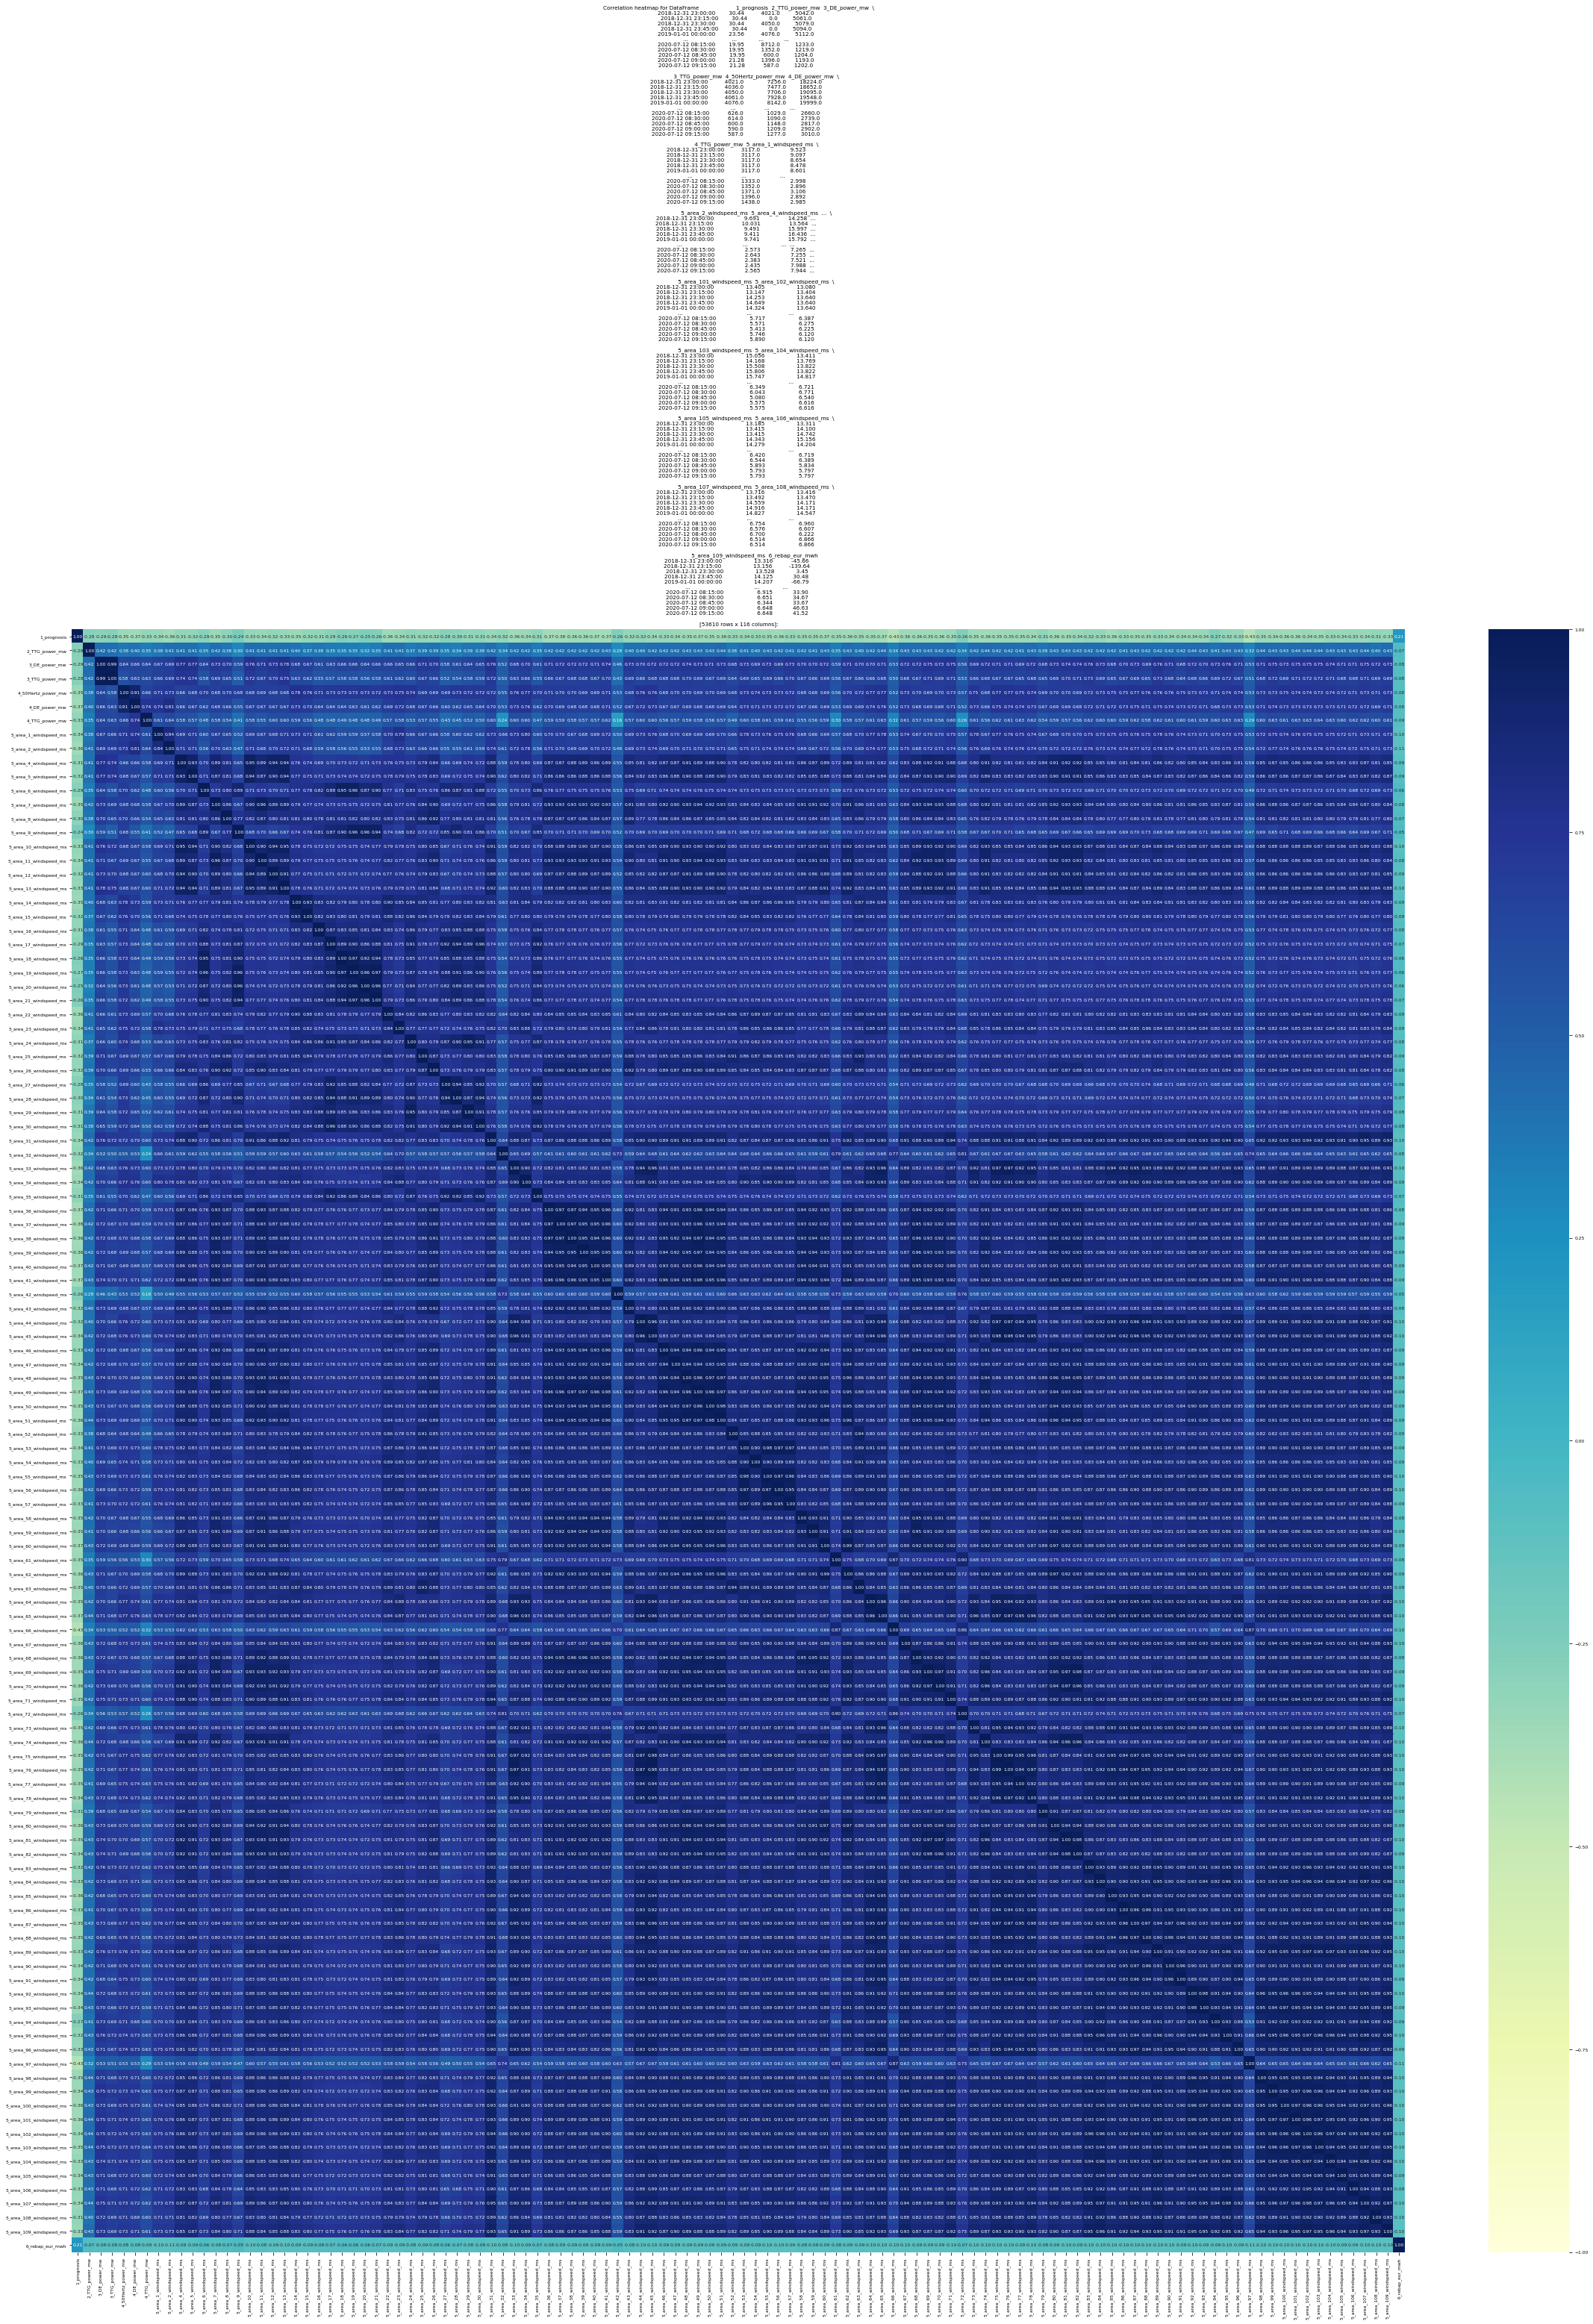

In [40]:
import seaborn as sns

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    # Correlation heatmap for reduced DataFrame df_ml:
    plt.figure(figsize=(40,40));
    plt.rcParams.update({'font.size':6})
    plt.title(f'Correlation heatmap for DataFrame {df}:')
    correlations = df.iloc[:, :].corr()
    mask = np.triu(correlations)
    sns.heatmap(correlations ,fmt='.2f', vmax=1, vmin=-1, annot=True, mask=None, cmap="YlGnBu");
    # plt.savefig('pictures/Correlation_Heatmap2.png', transparent=True)

correlation_matrix(df_pca)

### Filter out those rebap prizes that are not within 3 Standard deviations of the mean:

Now we will get rid of those outliers outside the +/- 3 Standard Deviation range with the following code line:

In [41]:
std_dev = 3*df_pca['6_rebap_eur_mwh'].std()
df_pca = df_pca[np.abs(df_pca['6_rebap_eur_mwh'] - df_pca['6_rebap_eur_mwh'].mean()) <= std_dev]

Check for NaNs in our combination Dataframe "df_pca":

In [42]:
df_pca.isna().sum()

1_prognosis                0
2_TTG_power_mw             0
3_DE_power_mw              0
3_TTG_power_mw             0
4_50Hertz_power_mw         0
                          ..
5_area_106_windspeed_ms    0
5_area_107_windspeed_ms    0
5_area_108_windspeed_ms    0
5_area_109_windspeed_ms    0
6_rebap_eur_mwh            0
Length: 116, dtype: int64

## rebap price distribution after elimination of the Outliers

Below is a Diagram of the Rebap price distribution without Outliers

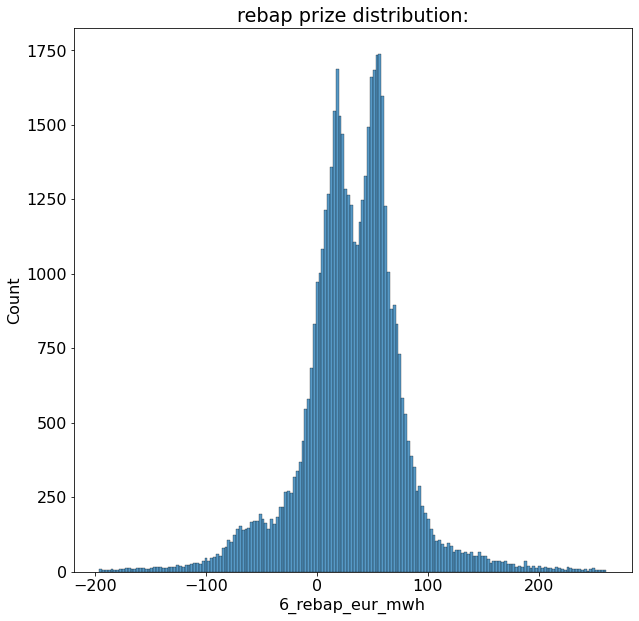

In [43]:
plt.figure(figsize=(10,10));
plt.rcParams.update({'font.size':16})
plt.title('rebap prize distribution:')
sns.histplot(data=df_pca, x="6_rebap_eur_mwh")
plt.show()

## Go with a binary classifier (above or below Zero €) to categorize the rebap
Define new column in which the rebap price_range is translated to the binary  classes 0 (below) or 1 (above zero):

In [44]:
df_pca["rebap_price_class"] = np.nan
for i in range (len(df_pca["rebap_price_class"])):
    if df_pca["6_rebap_eur_mwh"][i] <= 0:
        df_pca["rebap_price_class"][i] = 0
    else:
        df_pca["rebap_price_class"][i]= 1
"""
df.eval('rebap_dir = rebap_eur_mwh / rebap_eur_mwh.abs()', inplace = True)
"""
df_pca["rebap_price_class"] = df_pca["rebap_price_class"].astype('int')

In [45]:
# Check the class inbalance of the new target feature:
from collections import Counter
counter = Counter(df_pca["rebap_price_class"])
print(counter)

Counter({1: 43736, 0: 9389})


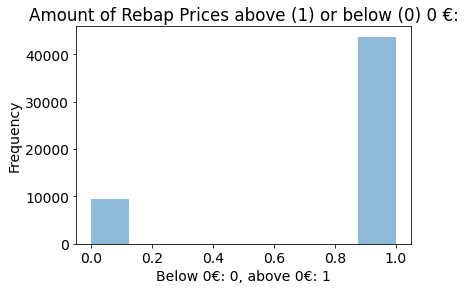

In [46]:
# Class Inbalance as a Graph
plt.rcParams.update({'font.size':14})
plt.xlabel('Below 0€: 0, above 0€: 1')
plt.ylabel('Frequency')
plt.title('Amount of Rebap Prices above (1) or below (0) 0 €:')
fig = df_pca["rebap_price_class"].plot.hist(bins=8, alpha=0.5)

### Train-Test_Split

Eliminate the old target column "6_rebap_eur_mwh"

In [47]:
df_pca = df_pca.drop(['6_rebap_eur_mwh'], axis= 1)

## Define features and target

In [48]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_pca.drop(["rebap_price_class"],axis=1)
y = df_pca["rebap_price_class"]

## Define a function "Rebap_classifier", which transforms the features and then trains a Naive Bayes Classifier to predict 

In [49]:
def Rebap_classifier(df, X, y, hours_shift=0, dim_num=14):
    """
    This function takes in a DataFrame as well as the features(X) and the target(y).
    "hours_shift" defines the amount of time the data in the features(X) are shifted 
    backwards in time, dim_num defines the amount of PCA features the Model takes into
    account (usually, higher dimensions means higher accuracy). 
    The output are the statistics for the Model efficiency (Gaussian Naive Bayes classifier)
    and the Heatmap for the target labels after running the PCA.
    
    """
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    # Shift the features (X) in a way that it is only with a time delay that these Data
    # are available to predict the target "rebap_price_class", eliminate the first N y 
    # target rows that it fits with the N dropped NaN rows of the X features:
    X = X.shift(int(hours_shift*4))
    y = y[int(hours_shift*4):]
    X = X.dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # balance the y classes to improve accuracy of the minority class detection:
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    # PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    df_scaled = pd.DataFrame(data=X_train_scaled,columns=df.columns[:-1])
    pca = PCA(n_components=None)
    df_scaled_pca = pca.fit(df_scaled)
    from sklearn.naive_bayes import GaussianNB

    variables = list(range(dim_num))
    #TODO: instantiate the model and train it on X_train_scaled_trans with the variables defined before, y_train (data any transformations)
    
    X_train_scaled_trans = pca.transform(df_scaled)
    X_train_scaled_trans = pd.DataFrame(data=X_train_scaled_trans)

    clf2 = GaussianNB()
    clf2.fit(X_train_scaled_trans[variables], y_train)
    
    #TODO: use implemented standard scaler to scale data
    X_test_scaled = scaler.transform(X_test)
    
    #TODO: transform the data with implemented PCA
    X_test_scaled_trans = pca.transform(X_test_scaled)

    X_test_scaled_trans = pd.DataFrame(data=X_test_scaled_trans)

    #TODO: predict y
    y_pred = clf2.predict(X_test_scaled_trans[variables])
    
    # we will use the accuracy score for an easy comparison of results
    from sklearn.metrics import accuracy_score
    
    from sklearn.metrics import confusion_matrix, classification_report

    sns.heatmap(confusion_matrix(y_test, y_pred), fmt= ".0f", annot=True, cmap='YlGn');
    
    return print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.59      0.40      1869
           1       0.89      0.70      0.79      8756

    accuracy                           0.68     10625
   macro avg       0.59      0.65      0.59     10625
weighted avg       0.79      0.68      0.72     10625



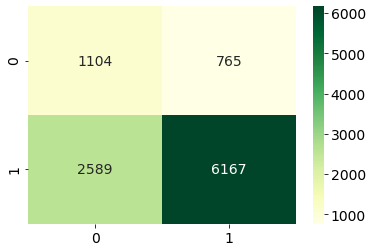

In [84]:
Rebap_classifier(df_pca, X, y, dim_num=12, hours_shift= 0)

In [54]:
df_pca.head()

,1_prognosis,2_TTG_power_mw,3_DE_power_mw,3_TTG_power_mw,4_50Hertz_power_mw,4_DE_power_mw,4_TTG_power_mw,5_area_1_windspeed_ms,5_area_2_windspeed_ms,5_area_4_windspeed_ms,...,5_area_101_windspeed_ms,5_area_102_windspeed_ms,5_area_103_windspeed_ms,5_area_104_windspeed_ms,5_area_105_windspeed_ms,5_area_106_windspeed_ms,5_area_107_windspeed_ms,5_area_108_windspeed_ms,5_area_109_windspeed_ms,rebap_price_class
2018-12-31 23:00:00,30.44,4021.0,5042.0,4021.0,7256.0,18224.0,3117.0,9.523,9.691,14.258,...,13.405,13.080,15.056,13.411,13.185,13.311,13.716,13.416,13.316,0
2018-12-31 23:15:00,30.44,0.0,5061.0,4036.0,7477.0,18652.0,3117.0,9.097,10.031,13.564,...,13.147,13.404,14.168,13.769,13.415,14.100,13.492,13.470,13.156,0
2018-12-31 23:30:00,30.44,4050.0,5079.0,4050.0,7706.0,19095.0,3117.0,8.654,9.491,15.997,...,14.253,13.640,15.508,13.822,13.415,14.742,14.559,14.171,13.528,1
2018-12-31 23:45:00,30.44,0.0,5094.0,4061.0,7928.0,19548.0,3117.0,8.478,9.411,16.436,...,14.649,13.640,15.806,13.822,14.343,15.156,14.916,14.171,14.125,1
2019-01-01 00:00:00,23.56,4076.0,5112.0,4076.0,8142.0,19999.0,3117.0,8.601,9.741,15.792,...,14.324,13.640,15.747,14.817,14.279,14.204,14.827,14.547,14.207,0


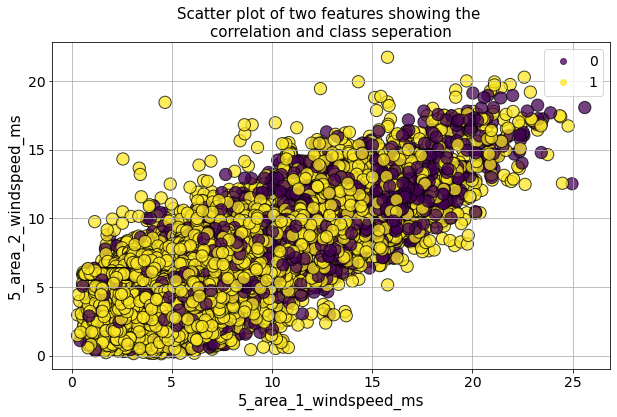

In [56]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_pca['5_area_12_windspeed_ms'],df_pca['5_area_22_windspeed_ms'],c=df_pca["rebap_price_class"],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
classes = ['0', '1']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("5_area_1_windspeed_ms",fontsize=15)
plt.ylabel("5_area_2_windspeed_ms",fontsize=15)
plt.show()

## 5-Bucket Classification
Let us now test how well a PCA withe a Gaussian NB Classifier works for a 5-Bucket approach of the target feature:
- class 0: Rebap price <  -75€
- class 1: -75€ <= Rebap price < -25€
- class 2: -25€ <= Rebap price < 25€
- class 3:  25€ <= Rebap price < 75€
- class 4:  Rebap price >= 75€

In [57]:
from apymb import *

df_pca_5_bucket = align(df_10_compact, df_11_compact, df_12_compact, df_13, df_7, df_14)

In [58]:
def df_target_class_5_bucket(df, df_num):
    df["rebap_price_class"] = np.nan
    for i in range (len(df["rebap_price_class"])):
        if df[f"{df_num}_rebap_eur_mwh"][i] < -75:
            df["rebap_price_class"][i] = 0
        elif -75 <= df[f"{df_num}_rebap_eur_mwh"][i] < -25:
            df["rebap_price_class"][i]= 1
        elif -25 <= df[f"{df_num}_rebap_eur_mwh"][i] < 25:
            df["rebap_price_class"][i]= 2
        elif 25 <= df[f"{df_num}_rebap_eur_mwh"][i] < 75:
            df["rebap_price_class"][i]= 3
        else:
            df["rebap_price_class"][i]= 4

    df["rebap_price_class"] = df["rebap_price_class"].astype('int')
    df = df.drop(f"{df_num}_rebap_eur_mwh", axis=1)
    return df

In [59]:
df_pca_5_bucket = df_target_class_5_bucket(df_pca_5_bucket, 6)

In [60]:
from sklearn.model_selection import train_test_split
X_3 = df_pca_5_bucket.drop(["rebap_price_class"],axis=1)
y_3 = df_pca_5_bucket["rebap_price_class"]

              precision    recall  f1-score   support

           0       0.05      0.44      0.08       283
           1       0.09      0.15      0.11       707
           2       0.24      0.01      0.01      3590
           3       0.48      0.18      0.26      4888
           4       0.13      0.50      0.20      1250

    accuracy                           0.16     10718
   macro avg       0.20      0.25      0.13     10718
weighted avg       0.32      0.16      0.16     10718



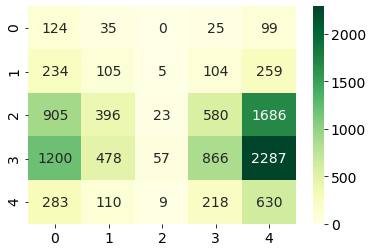

In [75]:
Rebap_classifier(df_pca_5_bucket, X_3, y_3, dim_num=2, hours_shift= 6 )